In [1]:
import pandas as pd
import numpy as np
import mibian
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from datetime import datetime
import datetime

In [2]:
Calls = pd.read_csv('nifty_311221_190122_1min_calls_py_vollib.csv')
#Calls = Calls[Calls['delta']>=0.05]
#Calls = Calls[Calls['delta']<0.9]
contractList = Calls['opt_symbol'].unique()

In [3]:
resList095 = ['Hedging PnL result treshold 095 holding 1day.csv',
             'Hedging PnL result treshold 095 holding 3day.csv',
             'Hedging PnL result treshold 095 holding 5day.csv',
             'Hedging PnL result treshold 095 holding 7day.csv']

resList085 = ['Hedging PnL result treshold 085 holding 1day.csv',
             'Hedging PnL result treshold 085 holding 3day.csv',
             'Hedging PnL result treshold 085 holding 5day.csv',
             'Hedging PnL result treshold 085 holding 7day.csv']

resList075 = ['Hedging PnL result treshold 075 holding 1day.csv',
             'Hedging PnL result treshold 075 holding 3day.csv',
             'Hedging PnL result treshold 075 holding 5day.csv',
             'Hedging PnL result treshold 075 holding 7day.csv']

resList065 = ['Hedging PnL result treshold 065 holding 1day.csv',
             'Hedging PnL result treshold 065 holding 3day.csv',
             'Hedging PnL result treshold 065 holding 5day.csv',
             'Hedging PnL result treshold 065 holding 7day.csv']

resList055 = ['Hedging PnL result treshold 055 holding 1day.csv',
             'Hedging PnL result treshold 055 holding 3day.csv',
             'Hedging PnL result treshold 055 holding 5day.csv',
             'Hedging PnL result treshold 055 holding 7day.csv']

In [7]:
df = pd.read_csv(resList095[0])
df = df.reset_index()
df

,index,Unnamed: 0,contract name,start date,delta,days_to_expiry,iv,BS delta PnL,MV delta PnL,holding period,model stable,MV delta
0,0,0,NIFTY22JAN17450CE,"2021-12-31, 15:25:00",0.491313,27.001042,0.124635,0.000000,0.000000,1,0.0,0.086794
1,1,1,NIFTY22JAN17450CE,"2022-01-01, 15:25:00",0.491313,27.001042,0.124635,0.000000,0.000000,1,0.0,0.086794
2,2,2,NIFTY22JAN17450CE,"2022-01-02, 15:25:00",0.491313,27.001042,0.124635,133.808993,23.638233,1,0.0,0.086794
3,3,3,NIFTY22JAN17450CE,"2022-01-03, 15:25:00",0.642103,24.001042,0.129904,105.080209,56.221721,1,1.0,0.343549
4,4,4,NIFTY22JAN17450CE,"2022-01-04, 15:25:00",0.733483,23.001042,0.125969,66.160157,5.482907,1,1.0,0.060786
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,1395,NIFTY22JAN18750CE,"2022-01-15, 15:25:00",0.145006,13.001042,0.103868,0.000000,0.000000,1,0.0,0.061732
1396,1396,1396,NIFTY22JAN18750CE,"2022-01-16, 15:25:00",0.145006,13.001042,0.103868,8.678611,3.694687,1,0.0,0.061732
1397,1397,1397,NIFTY22JAN18750CE,"2022-01-17, 15:25:00",0.154235,10.001042,0.107177,-34.911067,-13.911622,1,0.0,0.061461
1398,1398,1398,NIFTY22JAN18750CE,"2022-01-18, 15:25:00",0.073853,9.001042,0.124679,-10.387444,-8.456817,1,0.0,0.060127


In [43]:
#timeToMaturity = ['8','9','10','13','14','15','16','17','20','21','22','23','24','27']
t = 27
df_tmp = df[(abs(df['days_to_expiry'] - t) <0.05)]
#df_tmp

Text(0.5, 1.0, 'time to maturity: 27 days')

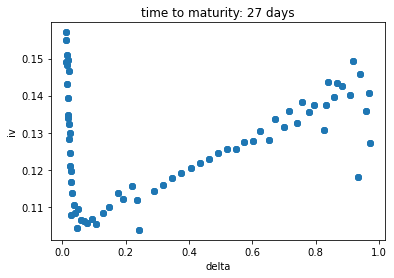

In [44]:
plt.scatter(df_tmp['delta'],df_tmp['iv'])
plt.xlabel('delta') 
plt.ylabel('iv') 
plt.title(f"time to maturity: {t} days")

In [14]:
max(df_tmp['iv'])

0.25237202032674216

In [11]:
df_tmp[df_tmp['iv']>0.20]

,index,Unnamed: 0,contract name,start date,delta,days_to_expiry,iv,BS delta PnL,MV delta PnL,holding period,model stable,MV delta
38,38,38,NIFTY22JAN16950CE,"2022-01-18, 15:25:00",0.917576,9.001042,0.257997,-129.057019,-104.239240,1,1.0,0.741125
178,178,178,NIFTY22JAN17000CE,"2022-01-18, 15:25:00",0.951668,9.001042,0.204929,-133.852093,-140.765117,1,1.0,1.000818
318,318,318,NIFTY22JAN16400CE,"2022-01-18, 15:25:00",0.846210,9.001042,0.543463,-136.366736,-93.321899,1,1.0,0.579100
338,338,338,NIFTY22JAN16700CE,"2022-01-18, 15:25:00",0.968083,9.001042,0.235199,-136.160940,-117.617708,1,1.0,0.836244
398,398,398,NIFTY22JAN16600CE,"2022-01-18, 15:25:00",0.947944,9.001042,0.289417,-133.328306,-207.026176,1,1.0,1.471924
478,478,478,NIFTY22JAN16500CE,"2022-01-18, 15:25:00",0.974131,9.001042,0.257383,-137.011505,-128.703497,1,1.0,0.915062
538,538,538,NIFTY22JAN17150CE,"2022-01-18, 15:25:00",0.915631,9.001042,0.213845,-141.831309,-154.665168,1,1.0,0.998484
598,598,598,NIFTY22JAN16000CE,"2022-01-18, 15:25:00",0.976357,9.001042,0.336718,-137.324674,-141.365394,1,1.0,1.005086
658,658,658,NIFTY22JAN17050CE,"2022-01-18, 15:25:00",0.845945,9.001042,0.324659,-118.982103,-59.382704,1,1.0,0.422202
738,738,738,NIFTY22JAN16300CE,"2022-01-18, 15:25:00",0.970976,9.001042,0.299380,-177.834225,-137.387972,1,1.0,0.750139
